<a href="https://www.kaggle.com/code/alirizaercan/spam-filtering-data-science-with-details?scriptVersionId=183492505" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
The primary goal of this notebook is to develop a predictive model that accurately classifies incoming Email messages as either spam or not. We will use the spam-mails-dataset.

**In this code, there will be some parts. These parts include every part of data science life cycle. If you want to be a succesfull data scientist/analyst/engineer, you shouldn't pass these life cycle steps!**

<font color='black'>

Content:

1. [Problem Definition and Project Planning](#1)
2. [Import Libraries](#2)   
3. [Load and Check Data](#3)
4. [Understand Dataset](#4)
5. [Column Description](#5)
6. [Exploratory Data Analysis](#6)   
    * [Univariate Variable Analysis(EDA)](#7)
7. [Basic Data Analysis](#8)
8. [Data Cleaning](#9)
    * [Outlier Detection](#10)
    * [Missing Values](#11)
9. [Feature Engineering](#12)
10. [Modeling](#13)

<a id = "1"></a><br>
# Problem Definition and Project Planning

## Problem Definition

This project aims to develop a spam mail detection with classification machine learning methods.

### Project Planning

#### Understanding the Objective

Our main goal is to detect mails spam or not.

#### Data Explanation

The spam-mails-dataset includes **spam_ham_dataset.csv** file.

**Import Libraries**

We will import the necessary libraries to perform data analysis and build machine learning models.

**Load and Check Data**

We will read and check the spam-mails-dataset in CSV format.

**Understand Dataset**

We will explore the dataset to gain a comprehensive understanding of its structure and contents.

**Column Description**

We will review columns.

**Exploratory Data Analysis (EDA)**

We will conduct Exploratory Data Analysis to deepen our understanding of the dataset. This includes visualizing data to uncover patterns and relationships.

**Data Cleaning**

We will clean the data by addressing issues such as duplicates, missing values, reformatting data types, checking and handling outliers, and validating.

**Feature Engineering**

We will focus on feature engineering to detect spam mails easily.

**Modelling**

We will choose the best machine learning model for predicting customer transactions based on the dataset.

**Submission File**

We will create the submission file, adhering to the required format.

Now, let's proceed with the code implementation according to these planned steps. Understanding each step is crucial for a comprehensive data science approach. Happy coding!

<a id = "2"></a><br>
# Import Libraries
We will need some libraries in this project, we need to import necessary libraries. We didn't choose our model so we will talk about model later. We can add our machine learning model libraries later. We can add 'matplotlib', 'seaborn', 'matplotlib.pyplot', 'warning' libraries right now. I can explain their roles in data science like that: 

**NumPy:**
Provides efficient numerical computation capabilities for arrays and matrices.

**Pandas:**
Offers high-performance, easy-to-use data structures and data analysis tools for labeled data.

**Matplotlib:**
Creates various static, animated, and interactive visualizations for data exploration and communication.

**Seaborn:**
Builds upon Matplotlib to create high-level statistical graphics with a focus on aesthetics and ease of use.

**warnings:**
Controls how Python handles warning messages.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/tmp/ipykernel_18/1527664740.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv


<a id = "3"></a><br>
# Load and Check Data
We will load and check data in this step.

In [2]:
df = pd.read_csv('/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv')
test_id = df["Unnamed: 0"]

We will see dataframe in the below!

In [3]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


<a id = "4"></a><br>
# Understand Dataset
We can understand dataset with some codes and we can check the dataset.

We can see the columns of train dataset:

In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

We will see the first 10 index and last 10 index in the below codes :

In [5]:
df.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [6]:
df.tail(10)

,Unnamed: 0,label,text,label_num
5161,4979,spam,Subject: penny stocks are about timing\r\nnoma...,1
5162,4162,spam,Subject: anomaly boys from 3881\r\nuosda apapr...,1
5163,1428,ham,Subject: re : meter # : 1266 ; august 2000 / a...,0
5164,4365,spam,Subject: slutty milf wants to meet you\r\ntake...,1
5165,2849,ham,"Subject: fw : crosstex energy , driscoll ranch...",0
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


We can see statistical details about data in the below code: 

In [7]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


# Column Description
In this step we should understand our dataset columns. If we don't understand our columns, we can't do our job with a good result!

* **Unnamed: 0 :** This column typically represents the rows that make up a dataframe. In a dataset obtained from Kaggle or another source, this column is usually used as the index column of the dataset. However, in dataset, it seems that this column is not an index column but rather an additional column created during indexing.

* **label:** This column contains the label of each instance. For example, it may contain categorical labels such as "spam" or "ham". "Spam" typically denotes unwanted emails, while "ham" denotes normal emails.

* **text:** This column contains the text content of each instance. It's usually the main column for processing text data. It's important for tasks like text classification or natural language processing.

* **label_num:** This column contains the numerical equivalents of the categorical labels. It's often used to encode categorical labels numerically for easier processing by machine learning algorithms. For example, 1 for the "spam" label and 0 for the "ham" label.

We can see the detailed info about dataset column. For example we can see data types with .info() method:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


We can say these things for data types according to the .info method:

* **Object Variables:**
  - label: object
  - text: object
  

* **Integer Variables:**
  - Unnamed: 0: int64
  - label_num: int64

<a id = "6"></a><br>
# Exploratory Data Analysis (EDA) 
We can understand data deeper in Exploratory Data Analysis (EDA). In this step, we will do exploratory data analysis.

### Numerical Variable

We will visualize numerical variable in this step. 

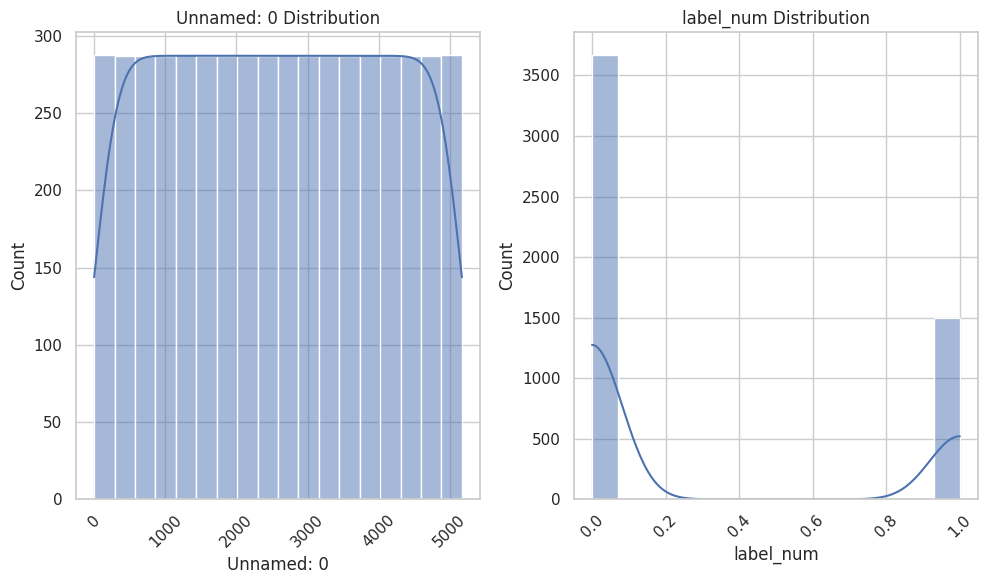

In [9]:
sns.set(style="whitegrid")
numerical_columns = df.select_dtypes(include=['int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
num_cols = len(numerical_columns)
num_rows = -(-num_cols // 4) 

plt.figure(figsize=(20, 6 * num_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Categorical Variable

We will visualize categorical variables! We will visualize only 'label' column because the other column is not distributed normal. It will not be understandable.

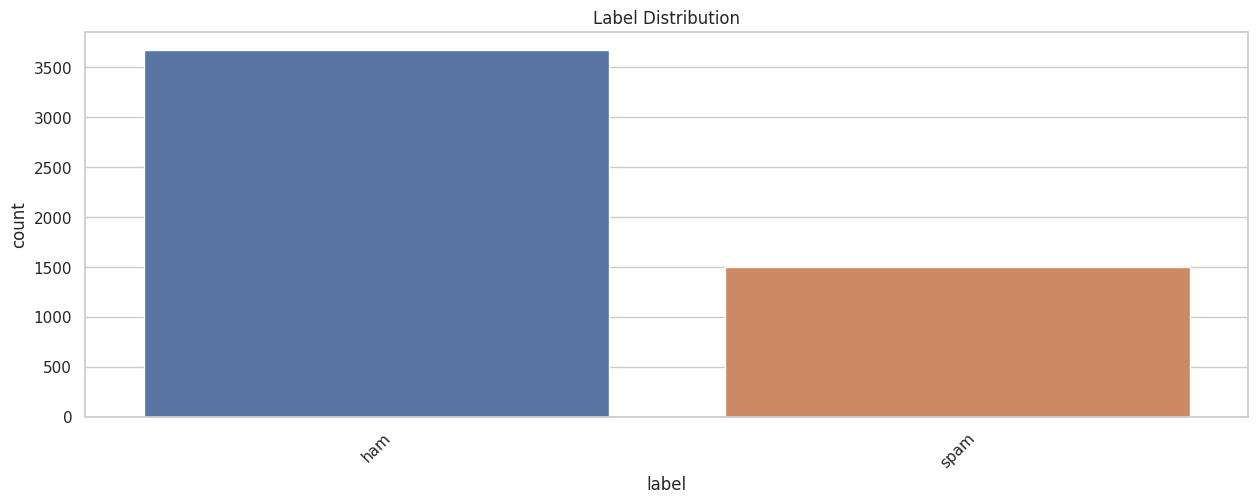

In [10]:
plt.figure(figsize=(15, 5))
sns.countplot(x='label', data=df)
plt.title('Label Distribution')
plt.xticks(rotation=45)
plt.show()

<a id = "8"></a><br>
# Basic Data Analysis

We will do basic data analysis. Basic data analysis serves as the foundation for understanding and extracting valuable insights from raw data. 


In [11]:
df[["label","label_num"]].groupby(["label"], as_index = False).mean().sort_values(by="label_num",ascending = False)

,label,label_num
1,spam,1.0
0,ham,0.0


In [12]:
df[["text","label_num"]].groupby(["text"], as_index = False).mean().sort_values(by="label_num",ascending = False)

,text,label_num
0,Subject: \r\n,1.0
4267,Subject: select eshopping for medicines and ta...,1.0
4242,Subject: satisfy her nj 2 w\r\nclick here to b...,1.0
4243,Subject: save 70 percent on super viagra 24663...,1.0
4244,Subject: save a bundle on meds !\r\nfont color...,1.0
...,...,...
2018,"Subject: hpl nom for march 1 , 2001\r\n( see a...",0.0
2019,"Subject: hpl nom for march 10 - 12 , 2001\r\n(...",0.0
2020,"Subject: hpl nom for march 13 , 2001\r\n( see ...",0.0
2021,"Subject: hpl nom for march 15 , 2001\r\n( see ...",0.0


<a id = "9"></a><br>
# Data Cleaning

In the data cleaning, we have the most important step for data science lifecycle. In a lot of project, this step is %80 of the work. We will give importance because of that data cleaning step.



In [13]:
df.duplicated().sort_values(ascending=False)

0       False
3474    False
3452    False
3451    False
3450    False
        ...  
1722    False
1721    False
1720    False
1719    False
5170    False
Length: 5171, dtype: bool

In [14]:
df.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

<a id = "12"></a><br>
# Feature Engineering

We will focus feature engineering for the best solution in the feature engineering. You can show your creative side in Feature Engineering. Let's show creative side in here!

We will focus NLP processes in here!

## Bag of Words (BOW) Algorithm

### Introduction
**The Bag of Words (BOW) model** is a simple yet powerful natural language processing tool used to extract features from text data. This approach converts text into fixed-length vectors by counting how many times each word appears. BOW models are widely used in various applications, including document classification, sentiment analysis, and topic modeling.

### Tokenization and Cleaning
**Step 1:** Tokenization

**What is it?** Tokenization is the process of splitting text into individual elements, typically words or phrases.
How it's done: This involves breaking down a block of text into smaller pieces, such as words or sentences. For example, the sentence "Hello, how are you?" can be tokenized into ["Hello", "how", "are", "you"].
**Step 2:** Cleaning

What is it? Cleaning involves removing unnecessary characters, such as punctuation, special characters, and numbers. It also includes converting all text to lowercase to ensure uniformity.
**Techniques used:**
Removing stop words (commonly used words such as "and", "the", etc. that do not contribute much meaning to the sentences).
Lemmatization or stemming, which simplifies words to their base or root form.


### Vectorization
Once the text has been tokenized and cleaned, the next step is to convert it into a numerical format that a machine learning algorithm can process. This is achieved through vectorization.

**Count Vectors:** Each document is represented by a vector where each dimension corresponds to a word from the entire corpus (collection of all documents), and the value in each dimension represents the frequency of the word in the document.
**TF-IDF Vectors (Term Frequency-Inverse Document Frequency):** This is a common variation that not only takes into account the frequency of a word in a single document (TF) but also how common the word is across all documents (IDF). This helps to adjust for the fact that some words appear more frequently in general.

In [15]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
ps = PorterStemmer()
corpus = []

all_stop_words = set(stopwords.words('english'))
all_stop_words.remove('not')

for i in range (len(df)):
    text = df['text'][i].lower().translate(str.maketrans('','', string.punctuation)).split()
    text = [ps.stem(word) for word in text if word not in all_stop_words]
    text = ' '.join(text)
    corpus.append(text)

<a id = "13"></a><br>
# Modeling
We will put model for our dataset. We completed all processes for our dataset! Firstly we will seperate train-test split.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFR
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [18]:
cv = CountVectorizer(max_features= 42500)
X = cv.fit_transform(corpus).toarray()
y = df['label_num']

In [19]:
len(X[0])

42500

## Train - Test Split
In the data, we should split data into train and test!

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Model
In this step. the data will be training the model!

In [21]:
def model_score(y_true,y_pred):
    acc_scor = accuracy_score(y_true, y_pred)
    prec_scor = precision_score(y_true, y_pred)
    recall_scor = recall_score(y_true, y_pred)
    f1_scor = f1_score(y_true, y_pred)
    overall_avg_score = (acc_scor + prec_scor + recall_scor + f1_scor) / 4

    print(f'Model accuracy score: {acc_scor}')
    print(f'Model precision score: {prec_scor}')
    print(f'Model recall score: {recall_scor}')
    print(f'Model f1 score: {f1_scor}')
    print(f'Average overall score performance: {overall_avg_score}')

    print(confusion_matrix(y_true, y_pred))

## Random Forest Classifier

In [22]:
cl_rf = RFR(n_estimators=100, random_state=42)
cl_rf.fit(X_train, y_train)
y_pred = cl_rf.predict(X_test)

In [23]:
np.column_stack((y_test[:15], y_pred[:15]))

array([[0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

## Model Score

In [24]:
model_score(y_test,y_pred)

Model accuracy score: 0.9719806763285024
Model precision score: 0.9506578947368421
Model recall score: 0.9537953795379538
Model f1 score: 0.9522240527182867
Average overall score performance: 0.9571645008303963
[[717  15]
 [ 14 289]]


In [25]:
test_obeyes = pd.Series(cl_rf.predict(X_test), name = "label_num")
results = pd.concat([test_id, test_obeyes],axis = 1)
results.to_csv("submission.csv",header=True, index = False)

In [26]:
result_df = pd.read_csv('submission.csv')
result_df

,Unnamed: 0,label_num
0,605,0.0
1,2349,0.0
2,3624,0.0
3,4685,1.0
4,2030,0.0
...,...,...
5166,1518,NaN
5167,404,NaN
5168,2933,NaN
5169,1409,NaN
